In [1]:
# Importing necessary libraries
import tensorflow as tf 
import cv2
import os 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


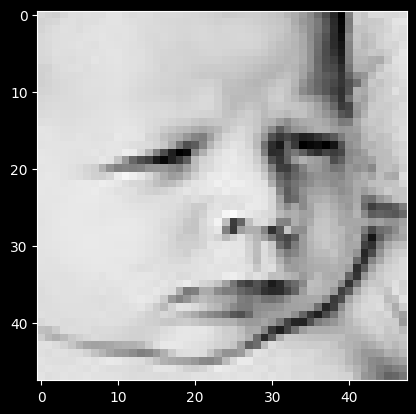

In [4]:
img_array = cv2.imread("FER/train/angry/PrivateTest_88305.jpg")
img_array.shape
plt.imshow(img_array)

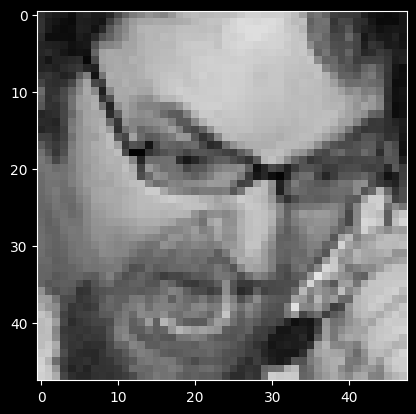

In [12]:
DataDirectory = "FER/train/"
classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'surprise']
for category in classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

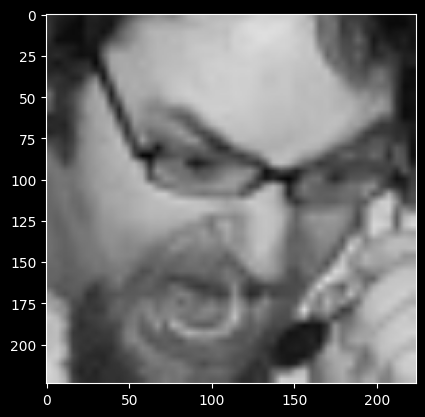

In [13]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# Read all images and convert them into array
training_data = []
def create_training_data():
    for category in classes:
        path = os.path.join(DataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
print(len(training_data))

7178


In [17]:
# Separate features and labels
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Define the CNN model for training
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model
model.fit(np.array(X_train) / 255.0, np.array(y_train), epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(np.array(X_test) / 255.0, np.array(y_test))
print(f'Test accuracy: {test_acc}')




Epoch 1/10
144/144 [==============================] - 168s 1s/step - loss: 1.8956 - accuracy: 0.2393 - val_loss: 1.8094 - val_accuracy: 0.2507
Epoch 2/10
144/144 [==============================] - 153s 1s/step - loss: 1.7818 - accuracy: 0.2648 - val_loss: 1.6846 - val_accuracy: 0.3220
Epoch 3/10
144/144 [==============================] - 162s 1s/step - loss: 1.6780 - accuracy: 0.3364 - val_loss: 1.6240 - val_accuracy: 0.3594
Epoch 4/10
144/144 [==============================] - 151s 1s/step - loss: 1.5895 - accuracy: 0.3841 - val_loss: 1.6233 - val_accuracy: 0.3681
Epoch 5/10
144/144 [==============================] - 150s 1s/step - loss: 1.4953 - accuracy: 0.4243 - val_loss: 1.5854 - val_accuracy: 0.3873
Epoch 6/10
144/144 [==============================] - 150s 1s/step - loss: 1.3394 - accuracy: 0.4951 - val_loss: 1.6525 - val_accuracy: 0.3960
Epoch 7/10
144/144 [==============================] - 153s 1s/step - loss: 1.1302 - accuracy: 0.5735 - val_loss: 1.7108 - val_accuracy: 0.4030

c:\Users\samar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:


# Load and preprocess the dataset for testing
DataDirectoryTest = "FER/test/"
testing_data = []
classes1 = ['angry', 'disgust', 'fear', 'happy']

def create_testing_data():
    for category in classes1:
        path = os.path.join(DataDirectoryTest, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

# Create testing data
create_testing_data()
print(len(testing_data))

8809


In [21]:
# Separate features and labels
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test) / 255.0  # Normalize pixel values
y_test = np.array(y_test)

# Evaluate the model on the test set
model.evaluate(X_test, y_test)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

276/276 [==============================] - 70s 252ms/step


Classification Report:
              precision    recall  f1-score   support

       angry       0.60      0.27      0.37      3995
     disgust       0.62      0.12      0.21       436
        fear       0.66      0.19      0.29      4097
       happy       0.11      0.46      0.18       281
         sad       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
    surprise       0.00      0.00      0.00         0

    accuracy                           0.23      8809
   macro avg       0.28      0.15      0.15      8809
weighted avg       0.61      0.23      0.32      8809


Confusion Matrix:
[[1085   17  334  500 1103  740  216]
 [  59   54   41   57  137   55   33]
 [ 638   15  760  478 1071  660  475]
 [  31    1   16  130   48   47    8]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]


c:\Users\samar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

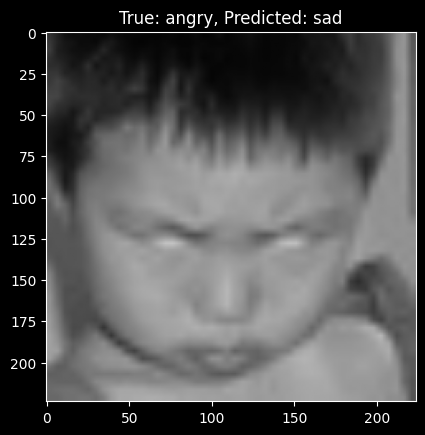

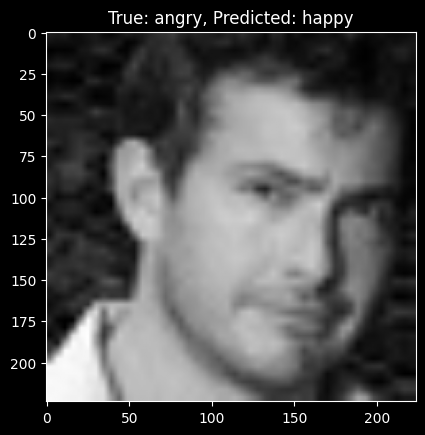

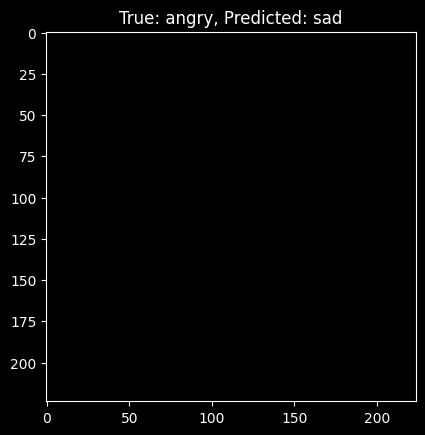

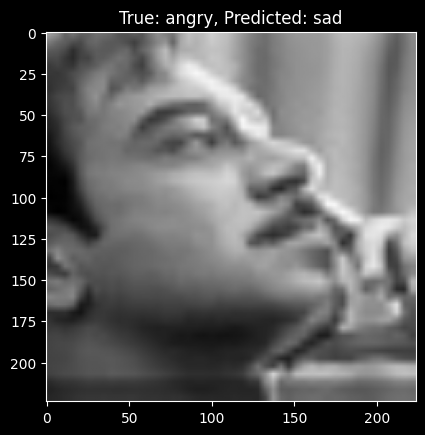

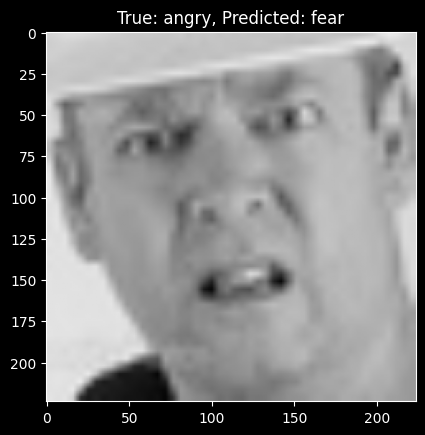

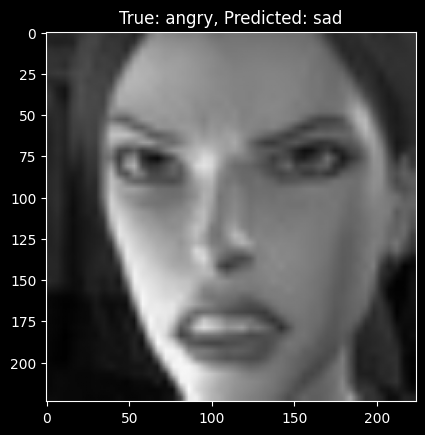

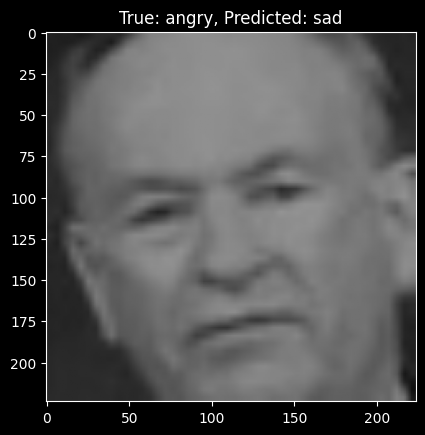

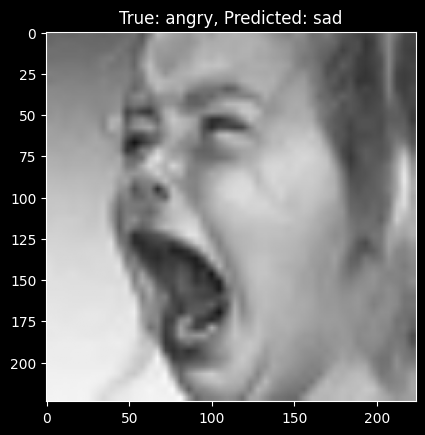

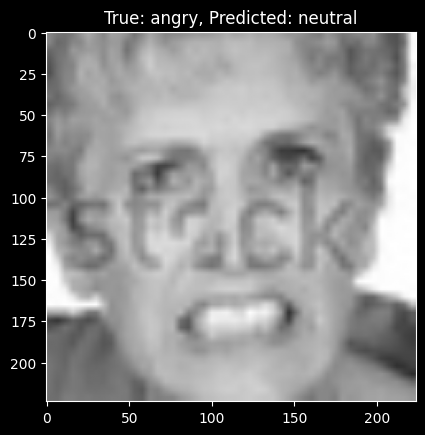

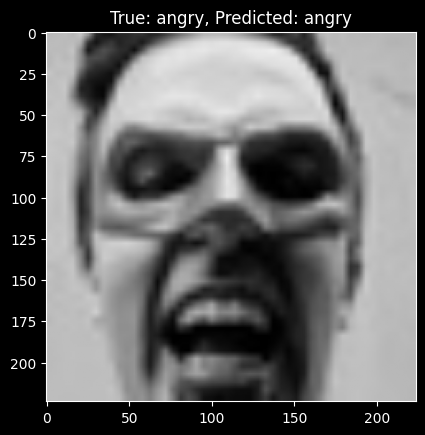

In [26]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, predicted_labels, target_names=classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted_labels))

# Visualize some predictions
for i in range(10):  # Adjust the range based on the number of images you want to visualize
    if X_test[i].shape[-1] == 3:  # Check if the image has 3 channels (color image)
        plt.imshow(X_test[i])
    else:  # Grayscale image
        plt.imshow(X_test[i].reshape(X_test[i].shape[:-1]), cmap='gray')

    plt.title(f"True: {classes[y_test[i]]}, Predicted: {classes[predicted_labels[i]]}")
    plt.show()